In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
def z_normalize(x):
  m,n = x.shape
  mean = np.zeros(n)
  std = np.zeros(n)
  for i in range(n):
    mean[i] = np.mean(x[:,i])
    std[i] = np.std(x[:,i])
    x[:,i] = (x[:,i] - mean[i])/std[i]
  return x

In [5]:
def poly_training_data(path):
  path = path.strip("'")
  df = pd.read_csv(path)

  u,v = df.shape
  v -= 2
  a_start = int(input("give the starting index of training data:"))
  a_end = int(input("give the ending index of training data:"))
  a = a_end - a_start
  x = np.zeros((a,v))
  y = np.zeros(a)

  df = df.iloc[a_start:a_end,:]
  x = df[df.columns[1:-1]].to_numpy()
  y = df[df.columns[-1]].to_numpy()

  return (x,y)

In [7]:
def poly_test_data(path_test):
  path_test = path_test.strip("'")
  df_test = pd.read_csv(path_test)

  u_test,v_test = df_test.shape
  v_test -= 1
  x_test = np.zeros((u_test,v_test))
  y_hat = np.zeros(u_test)

  df_test = df_test.iloc[:,1:]
  x_test = df_test[df_test.columns[:]].to_numpy()

  return (x_test,y_hat)

In [8]:
x_poly_train , y_poly_train = poly_training_data('/content/polynomial_regression_train.csv')

give the starting index of training data:0
give the ending index of training data:1000


In [18]:
x_cv , y_cv = poly_training_data('/content/polynomial_regression_train.csv')

give the starting index of training data:1000
give the ending index of training data:1200


In [9]:
x_test,y_hat = poly_test_data('/content/polynomial_regression_test.csv')

In [10]:
def poly_degree(x,degree):
  m,n = x.shape
  x_degree = np.zeros((m,1))
  for i in range(1,degree+1):
    x_degree = np.hstack((x_degree ,x**i))

  x_degree = x_degree[:,1:]
  return x_degree

In [11]:
def poly_cost(x,y,w,b):
  m,n = x.shape
  cost=0
  for i in range(m):
    f_wb = np.dot(x[i],w)+b
    cost = cost + (f_wb - y[i])**2
  cost = cost/(2*m)
  return cost

In [12]:
def poly_gradient(x,y,w,b):
  m,n = x.shape
  dj_dw=np.zeros((n,))
  dj_db=0
  for i in range(m):
    f_wb = np.dot(x[i],w)+b
    dj_db = dj_db + (f_wb - y[i])
    for j in range(n):
      dj_dw[j] = dj_dw[j] + (f_wb - y[i])*x[i,j]
  dj_dw = dj_dw/m
  dj_db = dj_db/m
  return dj_dw,dj_db

In [13]:
def poly_gradient_descent(x,y,w,b,alpha,num_itr,lambda_):
  m,n = x.shape
  cost_value = []
  w_history = []
  for i in range(num_itr):
    dj_dw,dj_db = poly_gradient(x,y,w,b)
    w = w*(1 - ((alpha*lambda_)/m)) - alpha*dj_dw
    b = b - alpha*dj_db

    if i<100000:
      cost_value.append(poly_cost(x,y,w,b))
    if i%math.ceil(num_itr/10)==0:
      print(f"Iteration {i:4}: Cost {cost_value[-1]:8.2f}")
      w_history.append(w)
  return w,b,cost_value,w_history

In [14]:
def polynomial_regression( x_poly ,y_poly_train):
  degree = int(input("Enter the value of degree: "))
  x_poly = poly_degree(x_poly_train,degree)
  x_poly = z_normalize(x_poly)

  u_train,v_train = x_poly.shape

  w_poly = np.zeros(v_train)
  b_poly = 0
  alpha_poly = float(input("give the value of alpha: "))
  num_itr_poly = int(input("give th number of iteration: "))
  lambda_ = float(input("give the value of lambda: "))
  w_poly,b_poly,cost_value,w_history = poly_gradient_descent(x_poly,y_poly_train,w_poly,b_poly,alpha_poly,num_itr_poly,lambda_)
  print(w_poly,b_poly)

  fig, (ax) = plt.subplots()
  ax.plot(cost_value)
  ax.set_xlabel('iteration')
  ax.set_ylabel('cost')
  ax.set_title('cost vs Iteration')
  plt.show()
  return(w_poly ,b_poly,degree)

Enter the value of degree: 5
give the value of alpha: 0.01
give th number of iteration: 1000
give the value of lambda: 3
Iteration    0: Cost     0.00
Iteration  100: Cost     0.00
Iteration  200: Cost     0.00
Iteration  300: Cost     0.00
Iteration  400: Cost     0.00
Iteration  500: Cost     0.00
Iteration  600: Cost     0.00
Iteration  700: Cost     0.00
Iteration  800: Cost     0.00
Iteration  900: Cost     0.00
[ 6.48835155e-10 -5.92535517e-10  3.30313224e-10  7.45749987e-10
  4.18238688e-10  1.16417237e-09 -1.47280659e-10 -2.45524371e-10
 -1.02477019e-09 -3.22521970e-10  4.46621650e-10  5.42760008e-10
  8.33510026e-10  3.69362042e-10  3.25534070e-12  2.29428126e-09
 -2.93826180e-09  9.73844627e-10  3.55753876e-10 -2.06295168e-09
 -3.41612731e-11  1.11066205e-09  1.42806977e-09 -7.00759879e-11
  5.92204287e-10] -5.045428027028396e-10


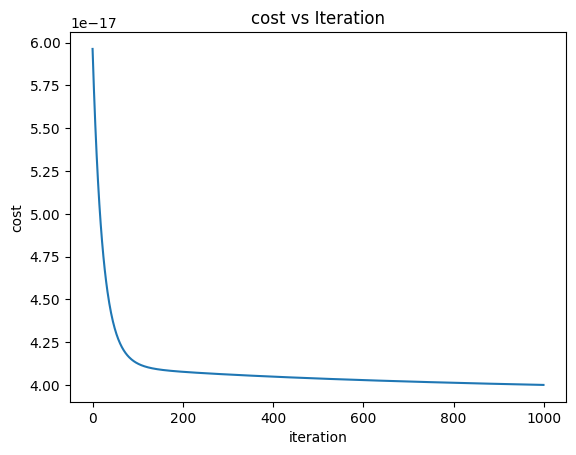

In [15]:
w_poly , b_poly ,degree = polynomial_regression(x_poly_train ,y_poly_train)

In [16]:
def R2(y_hat,y):
  a = ((y - y_hat)**2).sum()
  b = ((y - y.mean())**2).sum()
  R2 = 1 - (a/b)
  return R2

In [19]:
x_cv = poly_degree(x_cv,degree)
x_cv = z_normalize(x_cv)
y_hat = np.dot(x_cv,w_poly)+b_poly
print(f"R2 score: {R2(y_hat,y_cv)}")

R2 score: 0.2907333487583599


In [20]:
x_test = poly_degree(x_test,degree)
x_test = z_normalize(x_test)
y_hat = np.dot(x_test,w_poly) + b_poly

In [21]:
np.savetxt('Polynomial data test result.csv',y_hat,delimiter=',')